In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.roach.baseband

In [3]:
ri = kid_readout.roach.baseband.RoachBaseband()

Loaded ROACH state from /data/readout/roach_config.npz


In [5]:
res = np.load('/data/readout/resonances/current.npy')

In [6]:
ri.set_tone_freqs(res,nsamp=2**18)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



array([  94.11132812,  102.64257812,  104.68945312,  111.95507812,
        113.31445312,  127.28320312,  135.50195312,  136.84570312,
        146.09570312,  162.25195312,  162.48632812,  163.28320312,
        163.65820312,  177.64257812,  185.11132812,  187.11132812])

In [7]:
ri.set_dac_atten(41.)

In [8]:
ri.select_fft_bins(range(16))

In [15]:
d,addr = ri.get_data_seconds(30)

detected mcnt overflow None 2121685 0 16384 0 1520 2121685
detected mcnt overflow None 2121685 0 32768 1 17904 2121685


In [10]:
import kid_readout.analysis.iqnoise

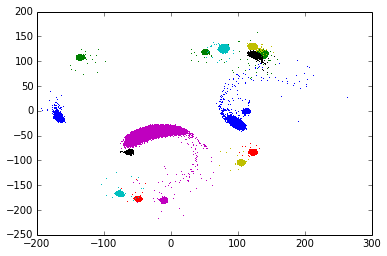

In [16]:
blah = plot(d.real,d.imag,',')

In [17]:
kid_readout.analysis.iqnoise.pca_noise??

In [18]:
fr, S, evals, evects, angles, piq = kid_readout.analysis.iqnoise.pca_noise(d[:,0])

using NFFT: 2** 16.0
10

/home/gjones/kid_readout/kid_readout/analysis/iqnoise.py:183: ComplexWarning: Casting complex values to real discards the imaginary part
  Pxx[:, i] = np.conjugate(fx[:numFreqs]) * fx[:numFreqs]
/home/gjones/kid_readout/kid_readout/analysis/iqnoise.py:184: ComplexWarning: Casting complex values to real discards the imaginary part
  Pyy[:, i] = np.conjugate(fy[:numFreqs]) * fy[:numFreqs]
/home/local/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


/home/local/lib/python2.7/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/local/lib/python2.7/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in cdouble_scalars
  ret = ret.dtype.type(ret / rcount)
/home/gjones/kid_readout/kid_readout/analysis/iqnoise.py:92: ComplexWarning: Casting complex values to real discards the imaginary part
  S[0, k] = ss[0, 0]
/home/gjones/kid_readout/kid_readout/analysis/iqnoise.py:93: ComplexWarning: Casting complex values to real discards the imaginary part
  S[1, k] = ss[1, 1]


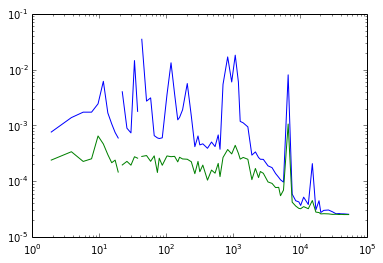

In [22]:
loglog(fr,(evals[1,:]))
loglog(fr,evals[0,:])


In [23]:
doff,addr = ri.get_data_seconds(30)

detected mcnt overflow None 2121685 0 16384 0 688 2121685
detected mcnt overflow None 2121685 0 32768 1 17072 2121685


In [24]:
fr, S, evals_off, evects, angles, piq = kid_readout.analysis.iqnoise.pca_noise(doff[:,0])

using NFFT: 2** 16.0
10


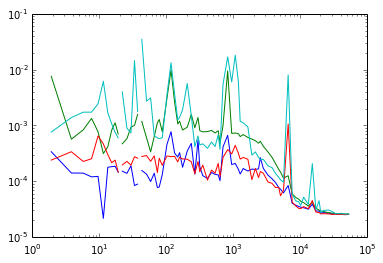

In [27]:

loglog(fr,evals_off.T)
loglog(fr,evals.T)


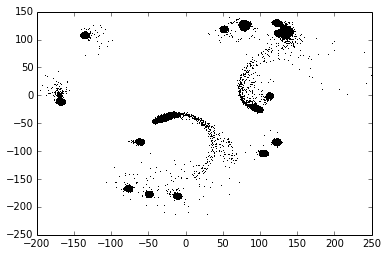

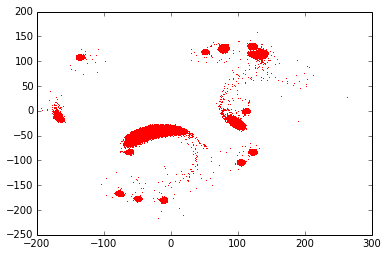

In [31]:
figure()
blah =plot(doff.real,doff.imag,'k,')
figure()
blah =plot(d.real,d.imag,'r,')


In [32]:
dnosrc,addr = ri.get_data_seconds(30)

detected mcnt overflow None 2121685 0 16384 0 1328 2121685
detected mcnt overflow None 2121685 0 32768 1 17712 2121685


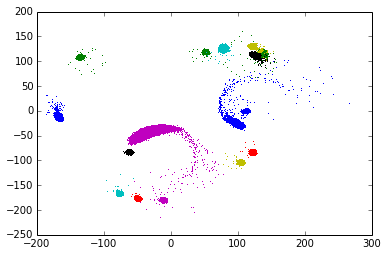

In [34]:
blah = plot(dnosrc.real,dnosrc.imag,',')

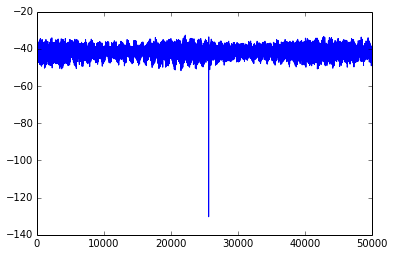

In [51]:
plot(doff[:50000,11].imag)#,doff.imag[:,11],',')

In [58]:
256*ri.fft_bins[0,11]/16384.

163.28125

In [177]:
ri.set_tone_freqs(np.array([104.697266]),nsamp=2**18)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



array([ 104.69726562])

In [178]:
ri.select_fft_bins(range(1))

In [140]:
ri.fpga_fft_readout_indexes

array([6701])

In [141]:
ri.fft_bins

array([[6701]])

In [142]:
256*ri.fft_bins[0,ri.readout_selection[0]]/16384.

104.703125

In [143]:
res[10:11]

array([ 162.48632812])

In [179]:
ri.set_dac_atten(61)

In [180]:
d11,addr=ri.get_data_seconds(4)

In [174]:
ri.set_modulation_output(7)

122.0703125

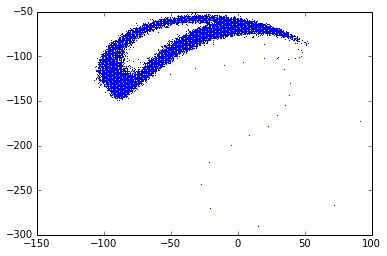

In [181]:
blah = plot(d11.real,d11.imag,',')

using NFFT: 2** 13.0


IndexError: index 1 is out of bounds for axis 1 with size 1

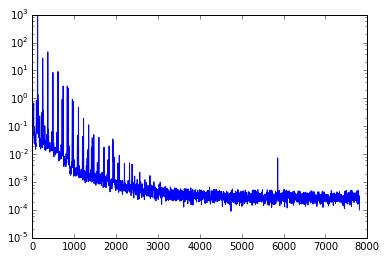

In [182]:
for k in range(16):
    fr, S, evals11, evects, angles, piq = kid_readout.analysis.iqnoise.pca_noise(d11[:,k],use_log_bins=False,Fs=256e6/2**14)
    semilogy(fr,evals11[1,:])
#ax = gca()
#ax.axvline(8)
xlim(0,1000)

In [173]:
1/840.

0.0011904761904761906

(0, 1000)

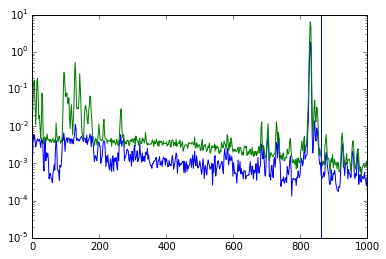

In [159]:
semilogy(fr,evals11.T)
ax = gca()
ax.axvline(862.)
xlim(0,1000)

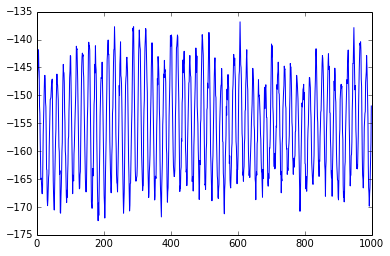

In [162]:
blah = plot(d11.real[:1000])

In [163]:
9620/25e-3

384800.0

In [164]:
5000/860.

5.813953488372093